# **HAND WRITTEN DIGITS CLASSIFIER USING AN MLP**

This project aims to develop a multilayer perceptron that is capable of identifying handwritten digits from 0 to 9.


The MNIST dataset is a widely used collection of handwritten digits that is commonly employed for training various machine learning algorithms, especially in the field of computer vision. MNIST stands for Modified National Institute of Standards and Technology database. It consists of 60,000 training images and 10,000 test images, each containing grayscale images of handwritten digits from 0 to 9. The images are 28x28 pixels in size, making them relatively small and easy to work with computationally. MNIST has been a benchmark dataset in the field of machine learning for evaluating and comparing the performance of different algorithms in tasks like classification and digit recognition.

In [ ]:
# imports here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
%matplotlib inline

Transformations Definition: It defines a series of transformations (transforms.Compose) to be applied to the dataset. In this case, it converts the images into PyTorch tensors (transforms.ToTensor()) and normalizes their pixel values to a range of [-1, 1] (transforms.Normalize()).

Dataset Loading: It loads the MNIST dataset, both for training (train_dataset) and testing (test_dataset). The torchvision.datasets.MNIST class is used for this purpose. The dataset is downloaded if it's not already present, and the specified transformations are applied during loading.

Data Loaders Creation: It creates data loaders (train_loader and test_loader) using torch.utils.data.DataLoader. Data loaders provide convenient batch processing and shuffling of the dataset during training. Here, a batch size of 64 is specified for both training and testing data.

Display Dataset Sizes: It prints the sizes of the training and test datasets. This is useful for understanding the amount of data available for training and evaluation purposes.

In [ ]:
# Define transformations to be applied to the data
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize the pixel values to the range [-1, 1]
])

# Load MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# Display the size of the dataset
print("Training data size:", len(train_dataset))
print("Test data size:", len(test_dataset))

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 16210687.07it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 506971.18it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4394837.06it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 1754192.34it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Training data size: 60000
Test data size: 10000


This code selects 5 random samples from the training dataset. It then plots these samples as images in a single row with their corresponding labels as titles, using matplotlib. Each subplot displays an image with its associated label. Finally, the plot is displayed.

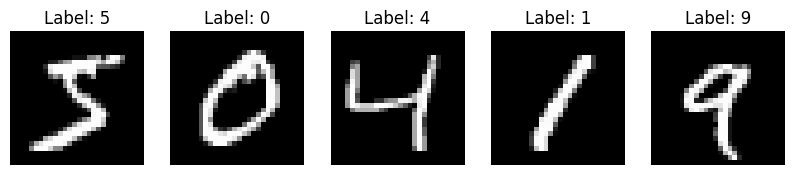

In [ ]:
# Get 5 random samples from the training dataset
samples = [train_dataset[i] for i in range(5)]

# Plot the samples
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    image, label = samples[i]
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(f"Label: {label}")
    plt.axis('off')
plt.show()

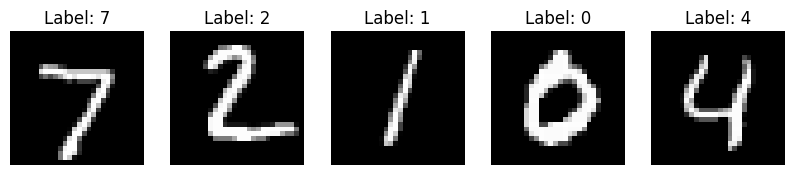

In [ ]:
# Get 5 random samples from the test dataset
samples = [test_dataset[i] for i in range(5)]

# Plot the samples
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    image, label = samples[i]
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(f"Label: {label}")
    plt.axis('off')
plt.show()

In [ ]:
# Define a simple MLP model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the input image
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
import matplotlib.pyplot as plt

# Initialize the model, loss function, and optimizer
model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Lists to store training loss and accuracy values
training_loss_values = []
training_accuracy_values = []

# Training loop
for epoch in range(20):  # number of epochs needed for training
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == labels).sum().item()
        total_predictions += labels.size(0)

        if i % 100 == 99:    # Print every 100 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 100))
            training_loss_values.append(running_loss / 100)  # Append average loss for this mini-batch
            training_accuracy_values.append(correct_predictions / total_predictions)  # Append accuracy for this mini-batch
            running_loss = 0.0
            correct_predictions = 0
            total_predictions = 0

print('Finished Training')

[1,   100] loss: 2.307
[1,   200] loss: 2.288
[1,   300] loss: 2.276
[1,   400] loss: 2.264
[1,   500] loss: 2.250
[1,   600] loss: 2.234
[1,   700] loss: 2.217
[1,   800] loss: 2.196
[1,   900] loss: 2.178
[2,   100] loss: 2.141
[2,   200] loss: 2.119
[2,   300] loss: 2.093
[2,   400] loss: 2.058
[2,   500] loss: 2.027
[2,   600] loss: 1.992
[2,   700] loss: 1.955
[2,   800] loss: 1.907
[2,   900] loss: 1.864
[3,   100] loss: 1.806
[3,   200] loss: 1.757
[3,   300] loss: 1.703
[3,   400] loss: 1.653
[3,   500] loss: 1.606
[3,   600] loss: 1.547
[3,   700] loss: 1.508
[3,   800] loss: 1.450
[3,   900] loss: 1.396
[4,   100] loss: 1.338
[4,   200] loss: 1.286
[4,   300] loss: 1.236
[4,   400] loss: 1.214
[4,   500] loss: 1.143
[4,   600] loss: 1.120
[4,   700] loss: 1.073
[4,   800] loss: 1.035
[4,   900] loss: 1.004
[5,   100] loss: 0.975
[5,   200] loss: 0.924
[5,   300] loss: 0.895
[5,   400] loss: 0.878
[5,   500] loss: 0.859
[5,   600] loss: 0.833
[5,   700] loss: 0.813
[5,   800] 

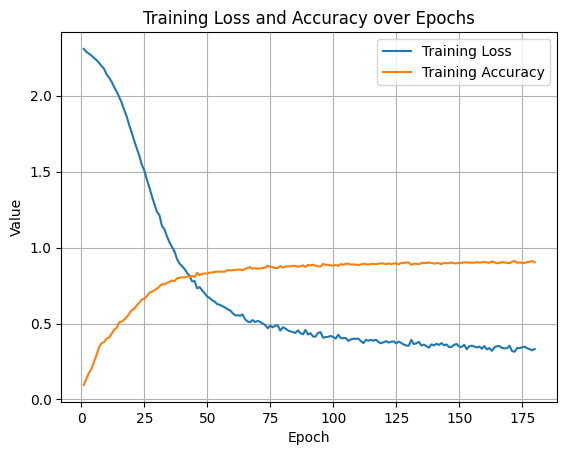

In [ ]:
# Plot training loss and accuracy
plt.plot(range(1, len(training_loss_values) + 1), training_loss_values, label='Training Loss')
plt.plot(range(1, len(training_accuracy_values) + 1), training_accuracy_values, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Training Loss and Accuracy over Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Evaluate the model on test data
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 90 %
